In [121]:
import numpy as np
from scipy.optimize import minimize
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

#### c)

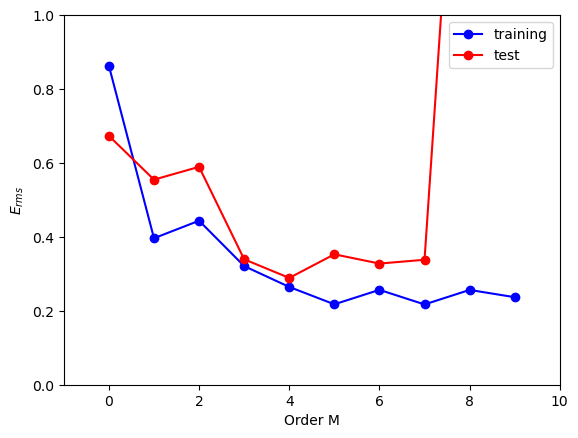

In [225]:
#Plotting for Analysis C
plt.plot(M, train_rms, c = 'blue', marker='o', label="training")
plt.plot(M, test_rms, c ='red', marker='o', label='test')
plt.xlim(-1, 10)
plt.ylim(0, 1)
plt.xlabel('Order M')
plt.ylabel('$E_{rms}$')
plt.legend()
plt.show()

## Activity 2

### Activity 2

Linear regression with regularization: Evaluating fit parameters for ln $\lambda$ = -18 and ln $\lambda$ = 0 (using regularized error function)

#### a) Difference between ln $\lambda$ = -18 (left) and ln $\lambda$ = 0 (right of fig 1.7)

M = 9 polynomial fitting 

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
/var/folders/7_/bmz8tp4j02qg7yj539sx5bxr0000gn/T/ipykernel_7847/3119795565.py:19: SyntaxWarning: invalid escape sequence '\l'
  axs[i].set_title(f'$\ln \lambda = ${element}')


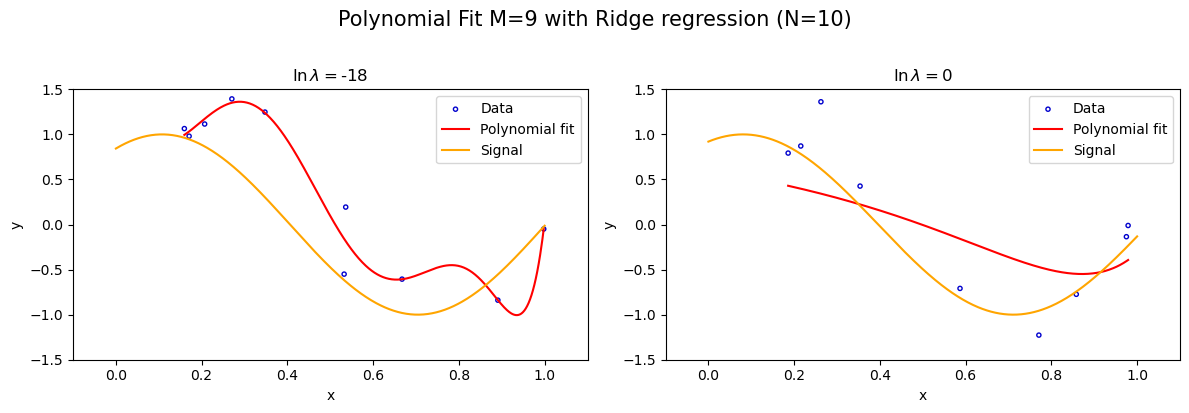

In [277]:
N = 10 #number of data points
ln_lambda = np.array([-18, 0])
fig, axs = plt.subplots(1, len(ln_lambda), figsize=(12, 4)) 
M = 9

for i, element in enumerate(ln_lambda): 
    x_data, y_data = data(N)
    x = x_data.reshape(-1,1)
    y = y_data.reshape(-1,1)
    poly = make_pipeline(PolynomialFeatures(M), Ridge(alpha=np.exp(element)))
    Fit = poly.fit(x, y)
    y = Fit.predict(x)
    x_continuous = np.linspace(x.min(), x.max(), 500) 
    y_fit = Fit.predict(x_continuous.reshape(-1,1))
    axs[i].scatter(x_data, y_data, facecolors='none', edgecolors='mediumblue', marker='.', label='Data')
    axs[i].plot(x_continuous, y_fit.reshape(-1), c='red', label='Polynomial fit')
    axs[i].plot(np.linspace(0, 1, 500), np.sin(2*np.pi*x_continuous),c='orange', label='Signal')
    axs[i].legend()
    axs[i].set_title(f'$\ln \lambda = ${element}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].set_xlim([-0.1,1.1])
    axs[i].set_ylim([-1.5, 1.5])

plt.suptitle("Polynomial Fit M=9 with Ridge regression (N=10)", fontsize=15, y=1.02)           
plt.tight_layout()
plt.show()

<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
/var/folders/7_/bmz8tp4j02qg7yj539sx5bxr0000gn/T/ipykernel_7847/2701580817.py:22: SyntaxWarning: invalid escape sequence '\l'
  axs[i, j].set_title(f'$\ln \lambda = ${element}', fontsize=12)


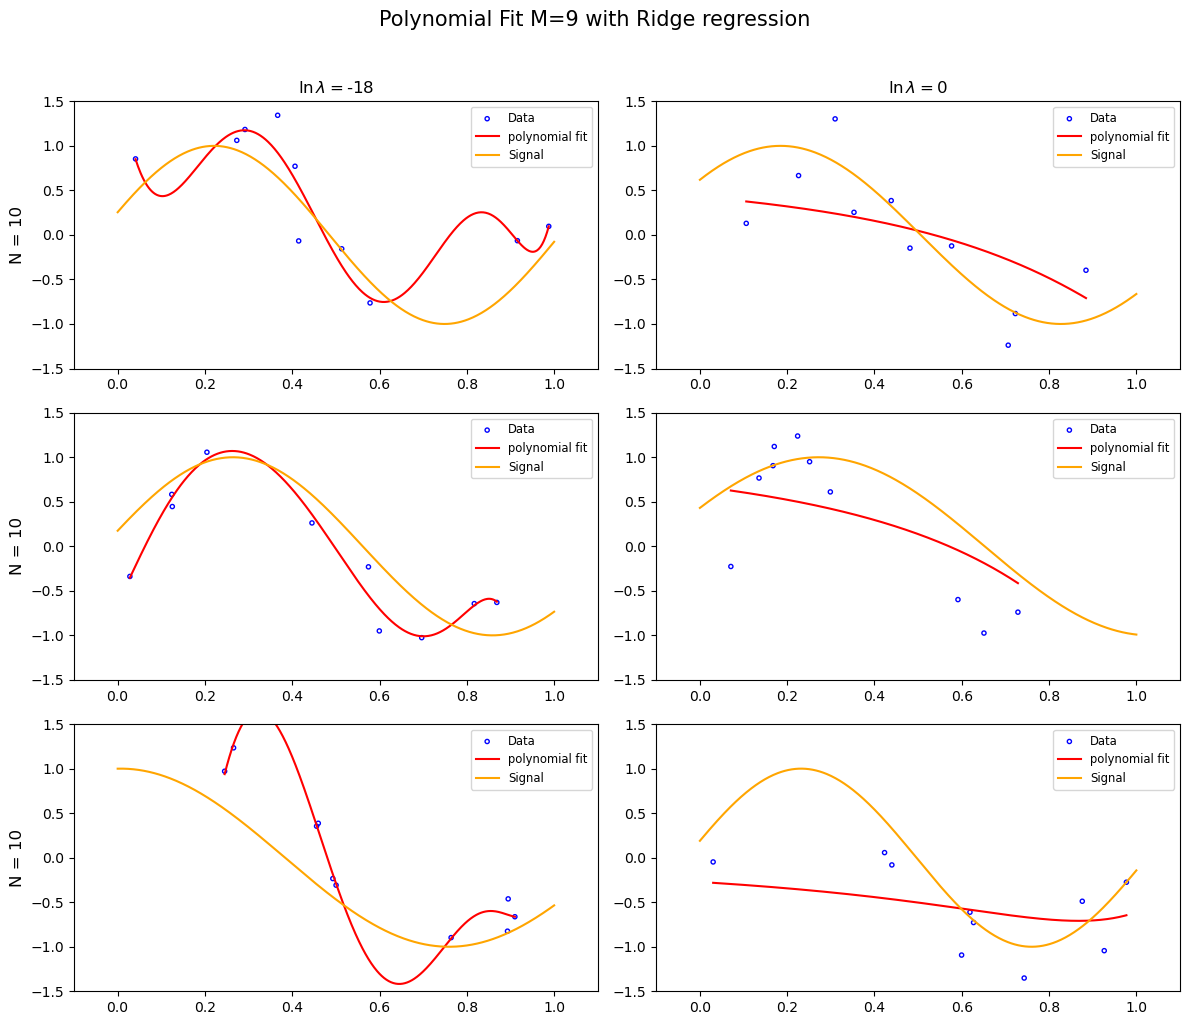

In [281]:
M = 9
N = [10, 10, 10]
ln_lambda = np.array([-18, 0])
fig, axs = plt.subplots(len(N), len(ln_lambda), figsize=(12, 10)) 

for i, n in enumerate(N):  
    for j, element in enumerate(ln_lambda):
        x_data, y_data = data(n)
        #ridge fit function needs 2D arrays as arguments
        # x and y (2D arrays)
        x = x_data.reshape(-1,1)
        y = y_data.reshape(-1,1)
        poly = make_pipeline(PolynomialFeatures(order), Ridge(alpha=np.exp(element)))
        Fit = poly.fit(x, y)
        y = Fit.predict(x)
        x_continuous = np.linspace(x.min(), x.max(), 500) 
        y_fit = Fit.predict(x_continuous.reshape(-1,1)) #Fit.predict needs 2D array
        axs[i, j].scatter(x_data, y_data, facecolors='none', edgecolors='blue', marker='.', label='Data')
        axs[i, j].plot(x_continuous, y_fit.reshape(-1), c='red', label='polynomial fit')
        axs[i, j].plot(np.linspace(0, 1, 500), np.sin(2*np.pi*x_continuous), c='orange', label='Signal')
        if i == 0:
            axs[i, j].set_title(f'$\ln \lambda = ${element}', fontsize=12)
        if j == 0:
            axs[i, j].set_ylabel(f"N = {n}", fontsize=12)
        axs[i, j].legend(fontsize='small', loc='best')
        axs[i, j].set_xlim([-0.1, 1.1])
        axs[i, j].set_ylim([-1.5, 1.5])
        axs[i, j].legend(fontsize='small', loc='best')

plt.suptitle("Polynomial Fit M=9 with Ridge regression", fontsize=15, y=1.02)
plt.tight_layout()
plt.show()

In [283]:
M = 9
N = 100
ln_lambda = np.linspace(-35, -3)

x_data, y_data = data(N)
#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25) #25% of the
# data goes to the test set
n_train = int(N*0.25)
n_test = int(N*0.75)
x_train = x_data[-n_train:]
y_train = y_data[-n_train:]
x_test = x_data[:n_test]
y_test = y_data[:n_test]
train_rms = np.array([])
test_rms = np.array([])

for i, element in enumerate(ln_lambda):
    #training set
    x1 = x_train.reshape(-1,1)
    y1 = y_train.reshape(-1,1)
    poly_train = make_pipeline(PolynomialFeatures(order), Ridge(alpha=np.exp(element)))
    Fit_train = poly_train.fit(x1, y1) #give the fitted parameters/coefficinets
    y_pred1 = Fit_train.predict(x1)
    y_pred1_1D = y_pred1.reshape(-1)
    Error_rms_train = np.sqrt(mean_squared_error(y_train, y_pred1_1D))
    train_rms = np.append(train_rms, Error_rms_train)
    
    #testing set
    x2 = x_test.reshape(-1,1)
    y2 = y_test.reshape(-1,1)
    #poly_test = make_pipeline(PolynomialFeatures(order), Ridge(alpha=np.exp(element)))
    #Fit_test = poly_test.fit(x2, y2) #give the fitted parameters/coefficients
    y_pred2 = Fit_train.predict(x2)
    y_pred2_1D = y_pred2.reshape(-1)
    Error_rms_test = np.sqrt(mean_squared_error(y_test, y_pred2_1D))
    test_rms = np.append(test_rms, Error_rms_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.38433e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.42411e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
/var/folders/7_/bmz8tp4j02qg7yj539sx5bxr0000gn/T/ipykernel_7847/3640146143.py:4: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\ln\lambda$')


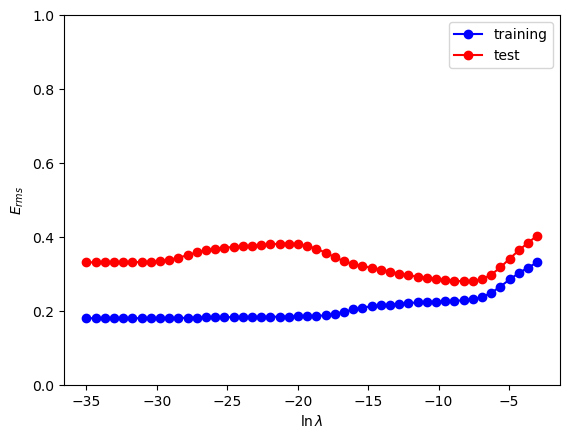

In [285]:
plt.plot(ln_lambda, train_rms, c = 'blue', marker='o', label="training")
plt.plot(ln_lambda, test_rms, c ='red', marker='o', label='test')
plt.ylim(0, 1)
plt.xlabel('$\ln\lambda$')
plt.ylabel('$E_{rms}$')
plt.legend()
plt.show()

### Activity 3 : Bayes Theorem : later in doc

### Activity 4: Bayesian Curve Fitting

<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
/var/folders/7_/bmz8tp4j02qg7yj539sx5bxr0000gn/T/ipykernel_7847/4021564834.py:35: SyntaxWarning: invalid escape sequence '\s'
  plt.fill_between(x_continuous, upper, lower, color ='pink', label = '$1\sigma$ deviation')


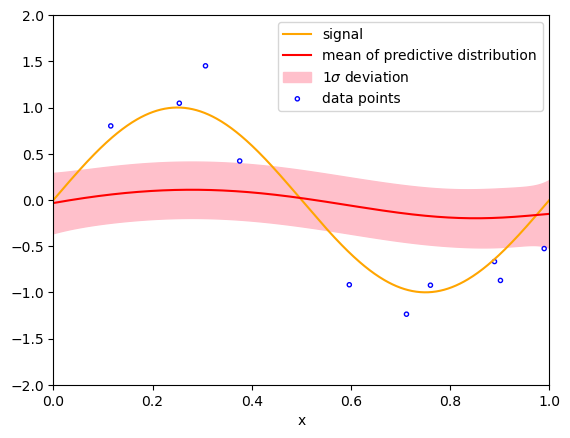

In [297]:
def phi(x):
    return np.array([x ** i for i in range(M + 1)]).reshape((M + 1, 1))

def mean(x, x_data, y_data, S): #m
    sum_element = np.zeros((M+1, 1))
    for n in range(len(x_data)):
        sum_element += np.dot(phi(x_data[n]), y_data[n])
    return beta * phi(x).T.dot(S).dot(sum_element)

def var(x, S): #s2
    return 1.0/beta + phi(x).T.dot(S).dot(phi(x))

def S(x_data):
    I = np.identity(M + 1)
    Sigma = np.zeros((M + 1, M + 1))
    for n in range(len(x_data)):
        Sigma += np.dot(phi(x_data[n]), phi(x_data[n]).T)
    S_inv = alpha * I + beta * Sigma
    return inv(S_inv)

M = 9
alpha = 0.005
beta = 11.1
N = 10
x_continuous = np.linspace(0, 1, 500)

S_matrix = S(x_data)
means = [mean(x, x_data1, y_data1, S_matrix)[0,0] for x in x_continuous]
variance = [var(x, S_matrix)[0,0] for x in x_continuous]
SD = np.sqrt(variance)
upper = np.array(means) + SD
lower = np.array(means) - SD
plt.plot(x_continuous, np.sin(2*np.pi*x_continuous), c = 'orange', label = "signal")
plt.plot(x_continuous, means, c ='r', label = 'mean of predictive distribution')
plt.fill_between(x_continuous, upper, lower, color ='pink', label = '$1\sigma$ deviation')
plt.scatter(x_data1, y_data1, facecolors='none', edgecolors='blue', marker = '.', label = 'data points')
plt.xlim(0.0, 1.0)
plt.ylim(-2, 2)
plt.xlabel("x")
plt.legend()   